#### **Correlation in codes**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(234)

In [3]:
# Create synthetic dataset
students = 40
study_hours = np.random.randint(1, 10, students)    # 1 to 9 hours study
job_hours = np.random.randint(0, 15, students)      # 0 to 14 hours job
sleep_hours = np.random.randint(4, 9, students)     # 4 to 8 hours sleep
extracurricular = np.random.randint(0, 6, students) # 0 to 5 hours activities

# Exam score: positively influenced by study & sleep, negatively by job & extra activities
exam_score = (40
    + 5*study_hours      # strong positive
    + 2*sleep_hours      # mild positive
    - 3*job_hours        # strong negative
    - 1*extracurricular  # mild negative
    + np.random.randint(-5,5,students)   # noise
)

data = pd.DataFrame({
    'Study Hours': study_hours,
    'Job Hours': job_hours,
    'Sleep Hours': sleep_hours,
    'Extracurricular Hours': extracurricular,
    'Exam Score': exam_score
})



In [4]:
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [5]:
# lets compute the correlation coefficients for each data feature

corr_coefficients = data.corr()
corr_coefficients

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
Study Hours,1.000000,-0.136551,-0.006383,-0.114442,0.694048
Job Hours,-0.136551,1.000000,0.188992,0.209991,-0.782525
Sleep Hours,-0.006383,0.188992,1.000000,0.158029,-0.035653
Extracurricular Hours,-0.114442,0.209991,0.158029,1.000000,-0.276837
Exam Score,0.694048,-0.782525,-0.035653,-0.276837,1.000000


In [6]:
data.columns

Index(['Study Hours', 'Job Hours', 'Sleep Hours', 'Extracurricular Hours',
       'Exam Score'],
      dtype='object')

In [7]:
# Lets plot the realationship on a scatter plot

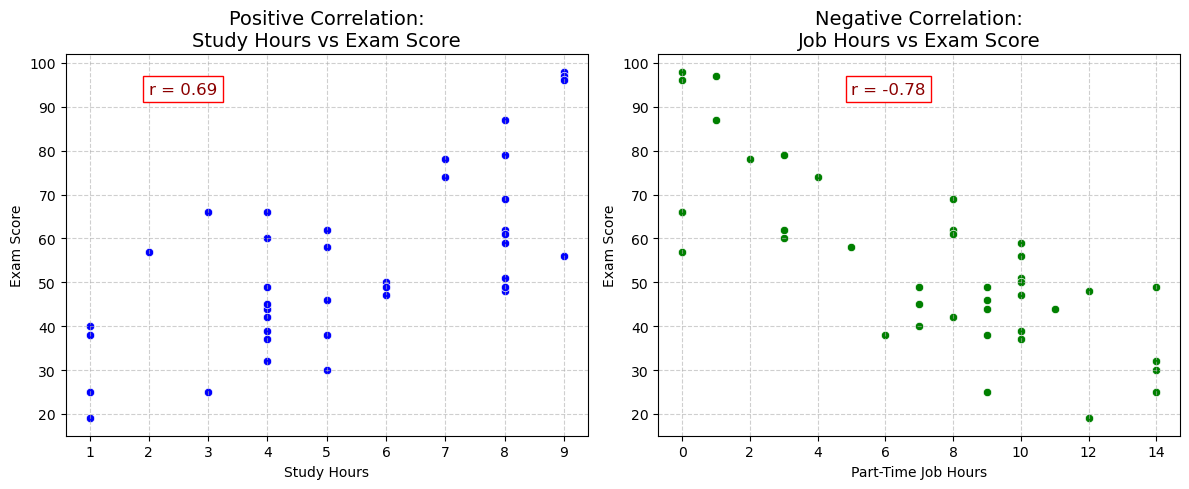

In [8]:
# Compute correlation matrix first (this defines 'corr')
corr = data[['Study Hours', 'Job Hours', 'Exam Score']].corr()

# Plot: Positive and Negative examples
plt.figure(figsize=(12,5))

# Positive correlation: Study vs Score
plt.subplot(1,2,1)
sns.scatterplot(x='Study Hours', y='Exam Score', data=data, color='blue')
plt.title("Positive Correlation:\nStudy Hours vs Exam Score", fontsize=14)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(data['Exam Score'])-5, 
         f"r = {corr.loc['Study Hours','Exam Score']:.2f}",
         fontsize=12, color="darkred", 
         bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

# Negative correlation: Job vs Score
plt.subplot(1,2,2)
sns.scatterplot(x='Job Hours', y='Exam Score', data=data, color='green')
plt.title("Negative Correlation:\nJob Hours vs Exam Score", fontsize=14)
plt.xlabel("Part-Time Job Hours")
plt.ylabel("Exam Score")
plt.text(5, max(data['Exam Score'])-5, 
         f"r = {corr.loc['Job Hours','Exam Score']:.2f}",   # fixed here
         fontsize=12, color="darkred", 
         bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

### **Regression**

**Simple Linear Regression (SLR)**

We want to see how study hours affect exam scores using Simple Linear Regression.

In [9]:
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [10]:
import statsmodels.api as sm


# Define variables for simple regression
X = data['Study Hours']
Y = data['Exam Score']

In [11]:
# Add intercept (constant term)
X = sm.add_constant(X)

In [12]:
X.head()

,const,Study Hours
0,1.0,9
1,1.0,5
2,1.0,2
3,1.0,4
4,1.0,8


In [13]:
# Fit model using OLS (Ordinary Least Squares)
model = sm.OLS(Y, X, random_state=42).fit()

c:\Users\olasunkanmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)


In [14]:
# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam Score   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     35.32
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           6.82e-07
Time:                        02:56:49   Log-Likelihood:                -161.99
No. Observations:                  40   AIC:                             328.0
Df Residuals:                      38   BIC:                             331.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.6404      5.476      4.500      

C:\Users\olasunkanmi\AppData\Local\Temp\ipykernel_12580\2670703555.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(2, max(data['Exam Score'])-5, f'Y = {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)


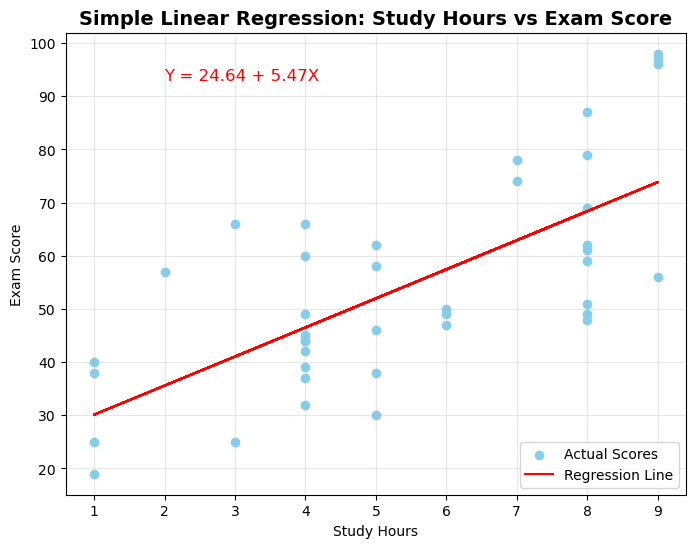

In [15]:
# lets have the regression plot using  regression line and scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['Study Hours'], data['Exam Score'], color='skyblue', label='Actual Scores')
plt.plot(data['Study Hours'], model.predict(X), color='red', label='Regression Line')

# Annotate
plt.title('Simple Linear Regression: Study Hours vs Exam Score', fontsize=14, weight='bold')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(data['Exam Score'])-5, f'Y = {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

This is our equation;
`Exam Score = 24.6404 + 5.4672 * Study_Hours`

`24.6404` -  This is the intercept (constant term).
It means that when a student studies 0 hours, their expected exam score is about 24.64 points.

`5.4672` -  This is the slope coefficient for Study Hours.
It means for every additional 1 hour of study, the student’s exam score is expected to increase by about 5.47 points, on average.

| Statistic                               | Meaning                                                       | Interpretation                                                                                                        |                                 |                                                                                                       |
| --------------------------------------- | ------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- | ------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **Dep. Variable: Exam Score**           | The outcome we’re trying to predict                           | Exam performance of students                                                                                          |                                 |                                                                                                       |
| **Model: OLS (Ordinary Least Squares)** | The estimation technique                                      | Standard linear regression method minimizing squared errors                                                           |                                 |                                                                                                       |
| **R-squared = 0.482**                   | Proportion of variance in Exam Score explained by Study Hours | About **48.2% of the variation** in exam scores is explained by study hours alone — a moderate to strong relationship |                                 |                                                                                                       |
| **Adj. R-squared = 0.468**              | Adjusted version accounting for number of predictors          | Very close to R² since we have only one predictor — confirms reliability                                              |                                 |                                                                                                       |
| **F-statistic = 35.32**                 | Tests if the model as a whole is statistically significant    | High F-value → model is statistically significant                                                                     |                                 |                                                                                                       |
| **Prob (F-statistic) = 6.82e-07**       | p-value of the overall model                                  | **p < 0.001**, so the model is highly significant (rejects null hypothesis that slope = 0)                            |                                 |                                                                                                       |
| **const = 24.6404**                     | Intercept                                                     | Predicted score when Study Hours = 0                                                                                  |                                 |                                                                                                       |
| **Study Hours = 5.4672**                | Coefficient (slope)                                           | For each extra hour of study, exam score increases by ~5.47                                                           |                                 |                                                                                                       |
| **t = 5.943, P>                         | t                                                             | = 0.000**                                                                                                             | Significance test for the slope | Very small p-value → slope is **statistically significant** (Study Hours truly influences Exam Score) |
| **[0.025, 0.975] = [3.605, 7.330]**     | 95% confidence interval for the slope                         | We are 95% confident the true slope is between **3.61 and 7.33**, showing positive effect                             |                                 |                                                                                                       |
| **Durbin-Watson = 1.738**               | Checks for autocorrelation in residuals                       | Close to 2 → No serious autocorrelation problem                                                                       |                                 |                                                                                                       |
| **Omnibus, JB, Skew, Kurtosis**         | Normality tests of residuals                                  | Values suggest residuals are approximately normal (no strong deviation)                                               |                                 |                                                                                                       |

To summarize our result, we would say that;

1. There is a strong, positive, and statistically significant relationship between how long students study and their exam performance.

2. Study Hours alone explains nearly half of the variability in scores.

The regression line gives us a predictive model or equation.

Predicted_Exam_Score
=24.64 + 5.47 * Study_Hours


- The **p-value < 0.001** confirms that the relationship is not due to chance.

**Lets Evaluate Our Model**

In [16]:
predictions = model.predict(X)
predictions # printed below are the predicted values

0     73.845272
1     51.976436
2     35.574810
3     46.509227
4     68.378063
5     62.910854
6     46.509227
7     30.107601
8     46.509227
9     46.509227
10    41.042019
11    62.910854
12    73.845272
13    46.509227
14    68.378063
15    57.443645
16    68.378063
17    51.976436
18    30.107601
19    30.107601
20    68.378063
21    57.443645
22    68.378063
23    46.509227
24    46.509227
25    46.509227
26    46.509227
27    51.976436
28    51.976436
29    73.845272
30    57.443645
31    68.378063
32    41.042019
33    68.378063
34    51.976436
35    46.509227
36    73.845272
37    68.378063
38    68.378063
39    30.107601
dtype: float64

`Residual(e) ​= Y(actual)​ ​− Y(predicted)**2`

In [17]:
# Lets use our predicted score to check the errors

data['Predicted Exam Score'] = predictions

data['Squared Error'] = (data['Exam Score'] - data['Predicted Exam Score']) ** 2

# Show a few rows
data[['Study Hours', 'Exam Score', 'Predicted Exam Score', 'Squared Error']].head()

,Study Hours,Exam Score,Predicted Exam Score,Squared Error
0,9,56,73.845272,318.453719
1,5,46,51.976436,35.717790
2,2,57,35.574810,459.038779
3,4,37,46.509227,90.425406
4,8,69,68.378063,0.386806


Each squared error shows how much our model missed by making inaccurate prediction of larger values or lesser values.

For us to conclude that we have a good model, our error must be as small as possible- that is, the model should minimize loss.

**Do well to take note of this and their difference**
- Error term (ε): theoretical, unobservable noise in the true population model.

- Residual (e): observable difference between actual and predicted values in your sample.

#### **multiple linear regression (several predictors)**

Here, our dependent variable is still Exam_Score,
but we will use multiple predictors or features

- Study Hours, Job Hours, Sleep Hours, Extracurricular Hours.

In [18]:

# Define predictors (independent variables)
X = data[['Study Hours', 'Job Hours', 'Sleep Hours', 'Extracurricular Hours']]

In [19]:
X.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours
0,9,10,4,2
1,5,9,5,1
2,2,0,6,3
3,4,10,6,5
4,8,8,7,1


In [20]:
# Add constant term (intercept)
X = sm.add_constant(X)

**What the Constant (Intercept) Represents**

- The constant (b₀) represents the predicted value of Y when all Xs = 0.

| Reason                                                       | Explanation                                                                                                                                   |
| ------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. To capture the baseline level of Y**                    | Even when all predictors are zero, Y might not be zero. For example, some students will score *something* even without studying.              |
| **2. To avoid forcing the line through the origin (0,0)**    | Without the constant, your regression line *must* pass through the origin, which is often unrealistic and can distort all other coefficients. |
| **3. To improve model fit**                                  | The intercept helps shift the regression line vertically to best fit the data. Without it, your model can have larger errors.                 |
| **4. To correctly estimate slopes**                          | If you omit the intercept, the slope estimates may become biased, because the model is trying to “force-fit” around zero.                     |
| **5. Because real-world data usually has nonzero baselines** | For example, people have some exam performance, income, or blood pressure even when explanatory variables are at 0.                           |


In [21]:
X.head()

,const,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours
0,1.0,9,10,4,2
1,1.0,5,9,5,1
2,1.0,2,0,6,3
3,1.0,4,10,6,5
4,1.0,8,8,7,1


In [22]:
# Define dependent variable
y = data['Exam Score']

In [23]:
y.head()

0    56
1    46
2    57
3    37
4    69
Name: Exam Score, dtype: int32

In [30]:
# Fit OLS regression
model_new = sm.OLS(y, X).fit()

In [32]:
# lets check the estimated coefficients
model_new.params

const                    44.790203
Study Hours               4.641188
Job Hours                -3.145561
Sleep Hours               1.573738
Extracurricular Hours    -0.876619
dtype: float64

`Predicted Exam Score = 44.79 + 4.64(Study Hours) − 3.15(Job Hours) + 1.57(Sleep Hours) −0.88(Extracurricular Hours)`

| Coefficient                       | Meaning                       | Interpretation                                                                                                                                                                       |
| --------------------------------- | ----------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **const = 44.79**                 | The intercept (constant term) | If a student does **0 hours** of study, job, sleep, and extracurriculars, their baseline exam score is **44.79**. It’s the model’s predicted starting point.                         |
| **Study Hours = +4.64**           | Positive relationship         | Each **additional hour of study** is expected to **increase** the exam score by about **4.64 points**, holding all other factors constant.                                           |
| **Job Hours = -3.15**             | Negative relationship         | Each **additional hour spent working a job** is expected to **decrease** exam score by about **3.15 points**, all else equal (since more job hours might reduce study time or rest). |
| **Sleep Hours = +1.57**           | Positive relationship         | Each **extra hour of sleep** increases exam score by about **1.57 points**, holding other variables constant.                                                                        |
| **Extracurricular Hours = -0.88** | Negative relationship         | Each **extra hour spent on extracurricular activities** reduces exam score by about **0.88 points**, likely because it cuts into study or rest time.                                 |


model.params gives the estimated weights the model assigns to each factor.

Together, they define the best-fitting line (or hyperplane) through your multidimensional data.

The signs (+ or -) show direction of the relationship.

The magnitudes show how strong each effect is.

**How to Interpret "Holding Other Factors Constant"**

In multiple regression, each coefficient shows the unique effect of that variable after controlling for others.

For example:

The “4.64” for Study Hours means the gain in exam score due to study time, assuming sleep, job hours, and extracurricular activities remain the same.

So this model isolates the independent impact of each variable that’s simply the power of multiple regression.

**Bringing Our Interpretation To Life**

Positive Influences

 - Study Hours and Sleep Hours both improve exam scores.

Negative Influences

- Job Hours and Extracurricular Hours lower exam scores.

Insight

- This aligns with intuition — more study and sleep are beneficial, while too much work or extracurricular activity can hurt performance.

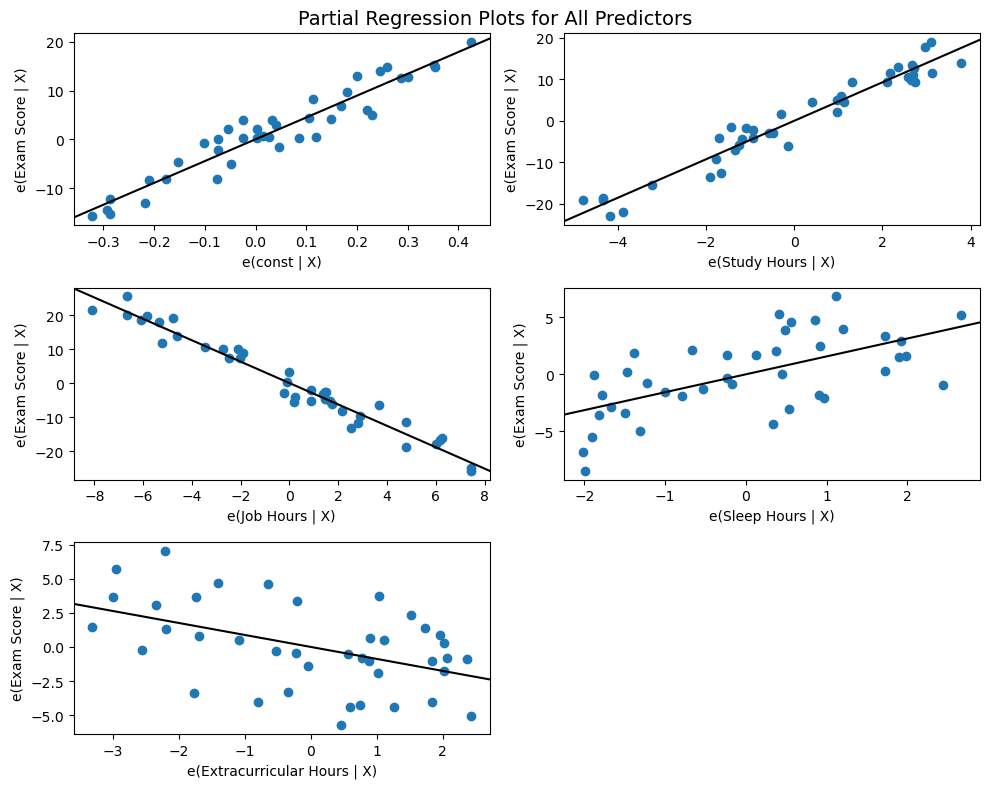

In [33]:
fig = plt.figure(figsize=(10,8))
sm.graphics.plot_partregress_grid(model_new, fig=fig)
plt.suptitle("Partial Regression Plots for All Predictors", fontsize=14)
plt.show()

In [35]:
# Display summary
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam Score   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     429.2
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           3.31e-29
Time:                        02:59:04   Log-Likelihood:                -96.874
No. Observations:                  40   AIC:                             203.7
Df Residuals:                      35   BIC:                             212.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    44.79

**Task 21**

1. Run the code above and interprets the result
2. Plot the regression line

#### Solution to Task 21

**Model Summary**


| Statistic                             | Meaning                           | Interpretation                                                             |
| ------------------------------------- | --------------------------------- | -------------------------------------------------------------------------- |
| **R-squared = 0.980**                 | Proportion of variance explained  | The model explains **98%** of the variation in Exam Scores. Excellent fit. |
| **Adj. R-squared = 0.978**            | Adjusted for number of predictors | Model remains strong even after adjustment.                                |
| **F-statistic = 429.2, p < 0.001**    | Overall model significance        | The regression model is **statistically significant**.                     |
| **Durbin-Watson = 2.121**             | Test for autocorrelation          | Close to 2 → **No significant autocorrelation** in residuals.              |
| **Prob(Omnibus) = 0.414, JB = 1.201** | Normality of residuals            | Residuals appear **normally distributed**.                                 |


**Coefficient Interpretation**


| Variable                  | Coefficient | Interpretation                                                                                    | Significance (p < 0.05?) |
| ------------------------- | ----------- | ------------------------------------------------------------------------------------------------- | ------------------------ |
| **Intercept (const)**     | 44.79       | If all predictors = 0, the baseline exam score is **44.79**.                                      | Significant                        |
| **Study Hours**           | 4.64        | Each additional study hour increases the exam score by **≈4.64 points**, holding others constant. | Significant                        |
| **Job Hours**             | -3.15       | Each extra job hour decreases the exam score by **≈3.15 points**, holding others constant.        | Significant                        |
| **Sleep Hours**           | 1.57        | Each extra sleep hour increases the exam score by **≈1.57 points**.                               | Significant                        |
| **Extracurricular Hours** | -0.88       | Each extra extracurricular hour decreases exam score by **≈0.88 points**.                         | Significant                        |


**NOTE:** All variables are statistically significant (p < 0.05).



**Interpretation Summary**

- The regression model is highly reliable and statistically strong.

- Study hours have the strongest positive effect.

- Job hours have the strongest negative effect.

- A good balance between study and sleep helps performance, while too many extracurriculars or work hours hurt exam outcomes.

C:\Users\olasunkanmi\AppData\Local\Temp\ipykernel_12580\3508101125.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(2, max(data['Exam Score'])-5, f'Y = {model_new.params[0]:.2f} + {model_new.params[1]:.2f}X', color='red', fontsize=12)


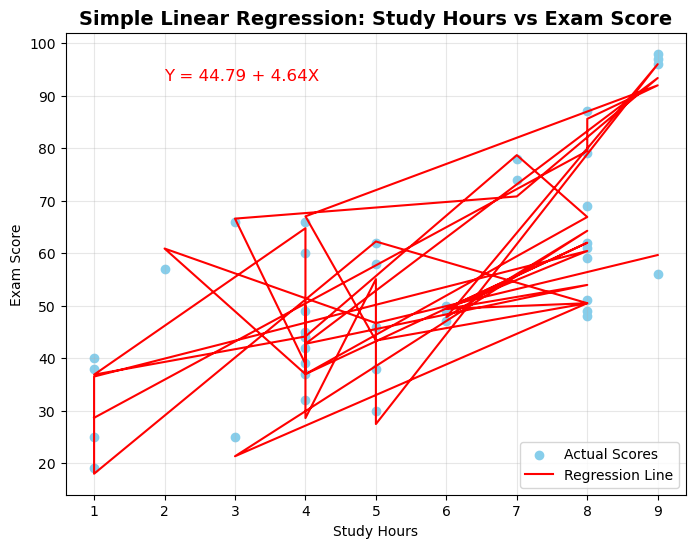

In [ ]:
# lets have the regression plot using  regression line and scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['Study Hours'], data['Exam Score'], color='skyblue', label='Actual Scores')
plt.plot(data['Study Hours'], model_new.predict(X), color='red', label='Regression Line')

# Annotate
plt.title('Simple Linear Regression: Study Hours vs Exam Score', fontsize=14, weight='bold')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(data['Exam Score'])-5, f'Y = {model_new.params[0]:.2f} + {model_new.params[1]:.2f}X', color='red', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


| Aspect           | **Statistical Regression (OLS)**                               | **Machine Learning Regression (sklearn)**     |                          |                                           |
| ---------------- | -------------------------------------------------------------- | --------------------------------------------- | ------------------------ | ----------------------------------------- |
| **Goal**         | *Explain relationships* and *test significance*                | *Predict outcomes* accurately                 |                          |                                           |
| **Focus**        | Interpretation of coefficients, p-values, confidence intervals | Performance (R², MAE, RMSE, cross-validation) |                          |                                           |
| **Output Table** | Rich summary (coef, std err, t, p>               t,, R², F-statistic, etc.)                                        | Minimal (just `.coef_` and `.intercept_`) |  |
| **Concern**      | “Is there a significant relationship?”                         | “Can we predict new data well?”               |                          |                                           |
| **Evaluation**   | Hypothesis tests                                               | Model validation and generalization           |                          |                                           |
| **Typical Use**  | Research, academic, social science                             | Data science, production, automation          |                          |                                           |
